In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

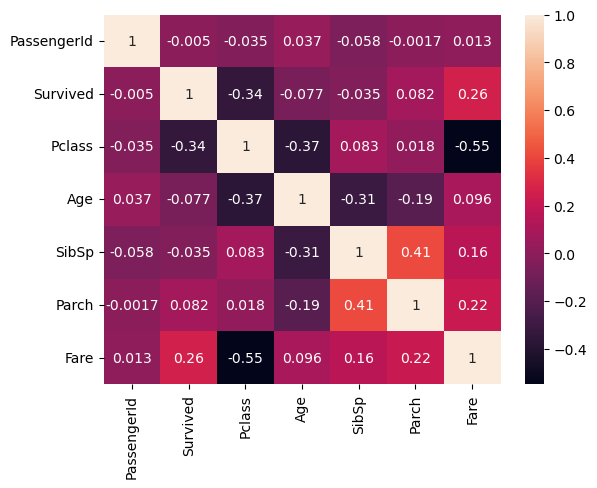

In [6]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

<Axes: xlabel='Survived', ylabel='count'>

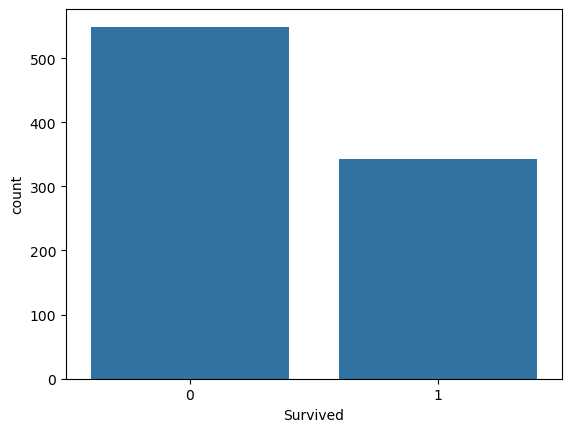

In [7]:
sns.countplot(data=df,x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

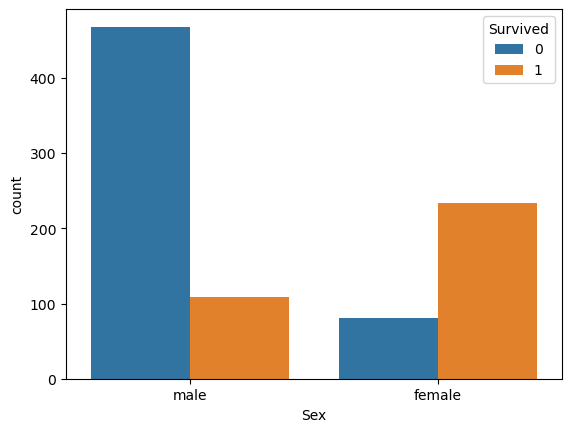

In [8]:
sns.countplot(data=df,x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

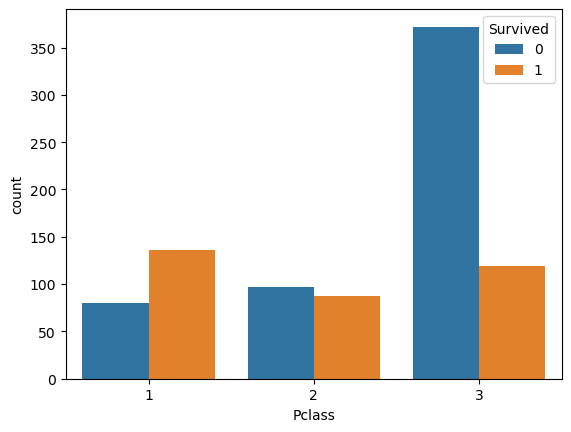

In [9]:
sns.countplot(data=df,x='Pclass', hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

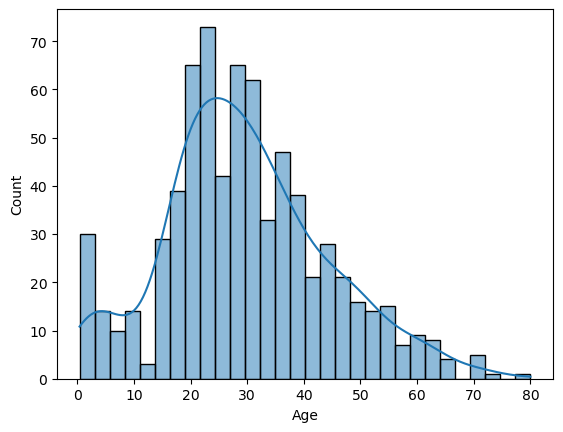

In [10]:
sns.histplot(data=df, x='Age', bins=30,kde=True)

In [11]:
df_cleaned = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [12]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
df_cleaned['Age'].fillna(df_cleaned['Age'].median(),inplace=True)

In [15]:
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0],inplace=True)

In [16]:
df_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
label_encoder = {}
for i in ['Sex','Embarked']:
    le = LabelEncoder()
    df_cleaned[i] = le.fit_transform(df_cleaned[i])
    label_encoder[i] = le
label_encoder

{'Sex': LabelEncoder(), 'Embarked': LabelEncoder()}

In [18]:
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
X = df_cleaned.drop('Survived',axis=1)
y = df_cleaned['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
print(accuracy_score(y_test,y_pred))

0.8169491525423729


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



In [27]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [40]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[164  11]
 [ 88  32]]
